In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_2_oversampling_and_bias'

In [3]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

In [4]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [5]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [6]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [7]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 4.1373 - cross entropy: 4.1373 - Brier score: 0.0863 - tp: 1198.0000 - fp: 657.0000 - tn: 10479.0000 - fn: 658.0000 - accuracy: 0.8988 - precision: 0.6458 - recall: 0.6455 - auc: 0.8449 - prc: 0.5020

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_1\assets


29/29 [==============================] - 97s 1s/step - loss: 4.1373 - cross entropy: 4.1373 - Brier score: 0.0863 - tp: 1198.0000 - fp: 657.0000 - tn: 10479.0000 - fn: 658.0000 - accuracy: 0.8988 - precision: 0.6458 - recall: 0.6455 - auc: 0.8449 - prc: 0.5020 - val_loss: 1.1764 - val_cross entropy: 1.1764 - val_Brier score: 0.0775 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8743 - val_prc: 0.5663 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 1.1293 - cross entropy: 1.1293 - Brier score: 0.0744 - tp: 1259.0000 - fp: 597.0000 - tn: 10539.0000 - fn: 597.0000 - accuracy: 0.9081 - precision: 0.6783 - recall: 0.6783 - auc: 0.8769 - prc: 0.5651

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_2\assets


29/29 [==============================] - 28s 1000ms/step - loss: 1.1293 - cross entropy: 1.1293 - Brier score: 0.0744 - tp: 1259.0000 - fp: 597.0000 - tn: 10539.0000 - fn: 597.0000 - accuracy: 0.9081 - precision: 0.6783 - recall: 0.6783 - auc: 0.8769 - prc: 0.5651 - val_loss: 1.1400 - val_cross entropy: 1.1400 - val_Brier score: 0.0749 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8731 - val_prc: 0.5660 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 1.1574 - cross entropy: 1.1574 - Brier score: 0.0759 - tp: 1200.0000 - fp: 607.0000 - tn: 10235.0000 - fn: 607.0000 - accuracy: 0.9040 - precision: 0.6641 - recall: 0.6641 - auc: 0.8699 - prc: 0.5660

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_3\assets


29/29 [==============================] - 29s 1s/step - loss: 1.1574 - cross entropy: 1.1574 - Brier score: 0.0759 - tp: 1200.0000 - fp: 607.0000 - tn: 10235.0000 - fn: 607.0000 - accuracy: 0.9040 - precision: 0.6641 - recall: 0.6641 - auc: 0.8699 - prc: 0.5660 - val_loss: 1.1335 - val_cross entropy: 1.1335 - val_Brier score: 0.0747 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8747 - val_prc: 0.5665 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 1.1579 - cross entropy: 1.1579 - Brier score: 0.0758 - tp: 1203.0000 - fp: 604.0000 - tn: 10238.0000 - fn: 604.0000 - accuracy: 0.9045 - precision: 0.6657 - recall: 0.6657 - auc: 0.8665 - prc: 0.5532

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_4\assets


29/29 [==============================] - 28s 998ms/step - loss: 1.1579 - cross entropy: 1.1579 - Brier score: 0.0758 - tp: 1203.0000 - fp: 604.0000 - tn: 10238.0000 - fn: 604.0000 - accuracy: 0.9045 - precision: 0.6657 - recall: 0.6657 - auc: 0.8665 - prc: 0.5532 - val_loss: 1.1306 - val_cross entropy: 1.1306 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8743 - val_prc: 0.5663 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - ETA: 0s - loss: 1.1285 - cross entropy: 1.1285 - Brier score: 0.0744 - tp: 1247.0000 - fp: 609.0000 - tn: 10527.0000 - fn: 609.0000 - accuracy: 0.9062 - precision: 0.6719 - recall: 0.6719 - auc: 0.8730 - prc: 0.5602

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_5\assets


29/29 [==============================] - 27s 958ms/step - loss: 1.1285 - cross entropy: 1.1285 - Brier score: 0.0744 - tp: 1247.0000 - fp: 609.0000 - tn: 10527.0000 - fn: 609.0000 - accuracy: 0.9062 - precision: 0.6719 - recall: 0.6719 - auc: 0.8730 - prc: 0.5602 - val_loss: 1.1294 - val_cross entropy: 1.1294 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8745 - val_prc: 0.5664 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - ETA: 0s - loss: 1.1475 - cross entropy: 1.1475 - Brier score: 0.0758 - tp: 1233.0000 - fp: 623.0000 - tn: 10513.0000 - fn: 623.0000 - accuracy: 0.9041 - precision: 0.6643 - recall: 0.6643 - auc: 0.8688 - prc: 0.5465

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_6\assets


29/29 [==============================] - 25s 880ms/step - loss: 1.1475 - cross entropy: 1.1475 - Brier score: 0.0758 - tp: 1233.0000 - fp: 623.0000 - tn: 10513.0000 - fn: 623.0000 - accuracy: 0.9041 - precision: 0.6643 - recall: 0.6643 - auc: 0.8688 - prc: 0.5465 - val_loss: 1.1291 - val_cross entropy: 1.1291 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8747 - val_prc: 0.5665 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - ETA: 0s - loss: 1.1373 - cross entropy: 1.1373 - Brier score: 0.0744 - tp: 1248.0000 - fp: 608.0000 - tn: 10528.0000 - fn: 608.0000 - accuracy: 0.9064 - precision: 0.6724 - recall: 0.6724 - auc: 0.8711 - prc: 0.5633

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_7\assets


29/29 [==============================] - 25s 874ms/step - loss: 1.1373 - cross entropy: 1.1373 - Brier score: 0.0744 - tp: 1248.0000 - fp: 608.0000 - tn: 10528.0000 - fn: 608.0000 - accuracy: 0.9064 - precision: 0.6724 - recall: 0.6724 - auc: 0.8711 - prc: 0.5633 - val_loss: 1.1289 - val_cross entropy: 1.1289 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8744 - val_prc: 0.5662 - lr: 0.0010
Epoch 8/100
29/29 [==============================] - ETA: 0s - loss: 1.1304 - cross entropy: 1.1304 - Brier score: 0.0746 - tp: 1246.0000 - fp: 610.0000 - tn: 10526.0000 - fn: 610.0000 - accuracy: 0.9061 - precision: 0.6713 - recall: 0.6713 - auc: 0.8705 - prc: 0.5511

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_8\assets


29/29 [==============================] - 25s 877ms/step - loss: 1.1304 - cross entropy: 1.1304 - Brier score: 0.0746 - tp: 1246.0000 - fp: 610.0000 - tn: 10526.0000 - fn: 610.0000 - accuracy: 0.9061 - precision: 0.6713 - recall: 0.6713 - auc: 0.8705 - prc: 0.5511 - val_loss: 1.1288 - val_cross entropy: 1.1288 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8747 - val_prc: 0.5665 - lr: 0.0010
Epoch 9/100
29/29 [==============================] - 10s 330ms/step - loss: 1.1483 - cross entropy: 1.1483 - Brier score: 0.0758 - tp: 1234.0000 - fp: 622.0000 - tn: 10514.0000 - fn: 622.0000 - accuracy: 0.9042 - precision: 0.6649 - recall: 0.6649 - auc: 0.8689 - prc: 0.5545 - val_loss: 1.1292 - val_cross entropy: 1.1292 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision:

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_10\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_10\assets


29/29 [==============================] - 28s 997ms/step - loss: 1.1590 - cross entropy: 1.1590 - Brier score: 0.0765 - tp: 1224.0000 - fp: 632.0000 - tn: 10504.0000 - fn: 632.0000 - accuracy: 0.9027 - precision: 0.6595 - recall: 0.6595 - auc: 0.8671 - prc: 0.5518 - val_loss: 1.1287 - val_cross entropy: 1.1287 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8744 - val_prc: 0.5662 - lr: 0.0010
Epoch 11/100
29/29 [==============================] - 10s 324ms/step - loss: 1.1684 - cross entropy: 1.1684 - Brier score: 0.0763 - tp: 1197.0000 - fp: 610.0000 - tn: 10232.0000 - fn: 610.0000 - accuracy: 0.9035 - precision: 0.6624 - recall: 0.6624 - auc: 0.8644 - prc: 0.5590 - val_loss: 1.1291 - val_cross entropy: 1.1291 - val_Brier score: 0.0746 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_19\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_19\assets


29/29 [==============================] - 34s 1s/step - loss: 0.7819 - cross entropy: 0.7819 - Brier score: 0.0515 - tp: 1188.0000 - fp: 183.0000 - tn: 10953.0000 - fn: 668.0000 - accuracy: 0.9345 - precision: 0.8665 - recall: 0.6401 - auc: 0.9478 - prc: 0.8300 - val_loss: 0.9396 - val_cross entropy: 0.9396 - val_Brier score: 0.0579 - val_tp: 1177.0000 - val_fp: 181.0000 - val_tn: 11819.0000 - val_fn: 823.0000 - val_accuracy: 0.9283 - val_precision: 0.8667 - val_recall: 0.5885 - val_auc: 0.9251 - val_prc: 0.7935 - lr: 9.5000e-04
Epoch 20/100
29/29 [==============================] - 10s 334ms/step - loss: 0.7623 - cross entropy: 0.7623 - Brier score: 0.0524 - tp: 1158.0000 - fp: 207.0000 - tn: 10929.0000 - fn: 698.0000 - accuracy: 0.9303 - precision: 0.8484 - recall: 0.6239 - auc: 0.9509 - prc: 0.8300 - val_loss: 0.9700 - val_cross entropy: 0.9700 - val_Brier score: 0.0574 - val_tp: 1300.0000 - val_fp: 353.0000 - val_tn: 11647.0000 - val_fn: 700.0000 - val_accuracy: 0.9248 - val_precisio

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_25\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_25\assets


29/29 [==============================] - 33s 1s/step - loss: 0.7379 - cross entropy: 0.7379 - Brier score: 0.0507 - tp: 1204.0000 - fp: 230.0000 - tn: 10906.0000 - fn: 652.0000 - accuracy: 0.9321 - precision: 0.8396 - recall: 0.6487 - auc: 0.9538 - prc: 0.8382 - val_loss: 0.7115 - val_cross entropy: 0.7115 - val_Brier score: 0.0479 - val_tp: 1346.0000 - val_fp: 222.0000 - val_tn: 11778.0000 - val_fn: 654.0000 - val_accuracy: 0.9374 - val_precision: 0.8584 - val_recall: 0.6730 - val_auc: 0.9593 - val_prc: 0.8523 - lr: 9.5000e-04
Epoch 26/100
29/29 [==============================] - 10s 332ms/step - loss: 0.7009 - cross entropy: 0.7009 - Brier score: 0.0485 - tp: 1239.0000 - fp: 233.0000 - tn: 10903.0000 - fn: 617.0000 - accuracy: 0.9346 - precision: 0.8417 - recall: 0.6676 - auc: 0.9588 - prc: 0.8509 - val_loss: 0.8479 - val_cross entropy: 0.8479 - val_Brier score: 0.0566 - val_tp: 1356.0000 - val_fp: 414.0000 - val_tn: 11586.0000 - val_fn: 644.0000 - val_accuracy: 0.9244 - val_precisio

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_27\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_27\assets


29/29 [==============================] - 28s 987ms/step - loss: 0.6761 - cross entropy: 0.6761 - Brier score: 0.0474 - tp: 1249.0000 - fp: 235.0000 - tn: 10901.0000 - fn: 607.0000 - accuracy: 0.9352 - precision: 0.8416 - recall: 0.6730 - auc: 0.9611 - prc: 0.8577 - val_loss: 0.6889 - val_cross entropy: 0.6889 - val_Brier score: 0.0477 - val_tp: 1392.0000 - val_fp: 304.0000 - val_tn: 11696.0000 - val_fn: 608.0000 - val_accuracy: 0.9349 - val_precision: 0.8208 - val_recall: 0.6960 - val_auc: 0.9615 - val_prc: 0.8577 - lr: 9.5000e-04
Epoch 28/100
29/29 [==============================] - 10s 332ms/step - loss: 0.6525 - cross entropy: 0.6525 - Brier score: 0.0467 - tp: 1311.0000 - fp: 268.0000 - tn: 10868.0000 - fn: 545.0000 - accuracy: 0.9374 - precision: 0.8303 - recall: 0.7064 - auc: 0.9636 - prc: 0.8594 - val_loss: 0.7390 - val_cross entropy: 0.7390 - val_Brier score: 0.0506 - val_tp: 1397.0000 - val_fp: 362.0000 - val_tn: 11638.0000 - val_fn: 603.0000 - val_accuracy: 0.9311 - val_preci

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_34\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_34\assets


29/29 [==============================] - 31s 1s/step - loss: 0.5867 - cross entropy: 0.5867 - Brier score: 0.0413 - tp: 1359.0000 - fp: 222.0000 - tn: 10914.0000 - fn: 497.0000 - accuracy: 0.9447 - precision: 0.8596 - recall: 0.7322 - auc: 0.9703 - prc: 0.8870 - val_loss: 0.6517 - val_cross entropy: 0.6517 - val_Brier score: 0.0451 - val_tp: 1402.0000 - val_fp: 225.0000 - val_tn: 11775.0000 - val_fn: 598.0000 - val_accuracy: 0.9412 - val_precision: 0.8617 - val_recall: 0.7010 - val_auc: 0.9643 - val_prc: 0.8682 - lr: 9.5000e-04
Epoch 35/100
29/29 [==============================] - 10s 332ms/step - loss: 0.5973 - cross entropy: 0.5973 - Brier score: 0.0420 - tp: 1364.0000 - fp: 259.0000 - tn: 10877.0000 - fn: 492.0000 - accuracy: 0.9422 - precision: 0.8404 - recall: 0.7349 - auc: 0.9692 - prc: 0.8828 - val_loss: 0.7130 - val_cross entropy: 0.7130 - val_Brier score: 0.0475 - val_tp: 1402.0000 - val_fp: 300.0000 - val_tn: 11700.0000 - val_fn: 598.0000 - val_accuracy: 0.9359 - val_precisio

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_45\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_45\assets


29/29 [==============================] - 31s 1s/step - loss: 0.4906 - cross entropy: 0.4906 - Brier score: 0.0356 - tp: 1406.0000 - fp: 208.0000 - tn: 10634.0000 - fn: 401.0000 - accuracy: 0.9519 - precision: 0.8711 - recall: 0.7781 - auc: 0.9793 - prc: 0.9149 - val_loss: 0.5902 - val_cross entropy: 0.5902 - val_Brier score: 0.0404 - val_tp: 1518.0000 - val_fp: 261.0000 - val_tn: 11739.0000 - val_fn: 482.0000 - val_accuracy: 0.9469 - val_precision: 0.8533 - val_recall: 0.7590 - val_auc: 0.9696 - val_prc: 0.8894 - lr: 9.0250e-04
Epoch 46/100
29/29 [==============================] - 10s 333ms/step - loss: 0.4815 - cross entropy: 0.4815 - Brier score: 0.0342 - tp: 1483.0000 - fp: 220.0000 - tn: 10916.0000 - fn: 373.0000 - accuracy: 0.9544 - precision: 0.8708 - recall: 0.7990 - auc: 0.9792 - prc: 0.9172 - val_loss: 1.1188 - val_cross entropy: 1.1188 - val_Brier score: 0.0507 - val_tp: 1419.0000 - val_fp: 325.0000 - val_tn: 11675.0000 - val_fn: 581.0000 - val_accuracy: 0.9353 - val_precisio

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_59\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_59\assets


29/29 [==============================] - 34s 1s/step - loss: 0.4491 - cross entropy: 0.4491 - Brier score: 0.0319 - tp: 1498.0000 - fp: 213.0000 - tn: 10923.0000 - fn: 358.0000 - accuracy: 0.9560 - precision: 0.8755 - recall: 0.8071 - auc: 0.9822 - prc: 0.9288 - val_loss: 0.5761 - val_cross entropy: 0.5761 - val_Brier score: 0.0412 - val_tp: 1485.0000 - val_fp: 280.0000 - val_tn: 11720.0000 - val_fn: 515.0000 - val_accuracy: 0.9432 - val_precision: 0.8414 - val_recall: 0.7425 - val_auc: 0.9717 - val_prc: 0.8888 - lr: 8.5737e-04
Epoch 60/100
29/29 [==============================] - 10s 332ms/step - loss: 0.4564 - cross entropy: 0.4564 - Brier score: 0.0325 - tp: 1492.0000 - fp: 203.0000 - tn: 10933.0000 - fn: 364.0000 - accuracy: 0.9564 - precision: 0.8802 - recall: 0.8039 - auc: 0.9807 - prc: 0.9217 - val_loss: 0.6632 - val_cross entropy: 0.6632 - val_Brier score: 0.0470 - val_tp: 1487.0000 - val_fp: 379.0000 - val_tn: 11621.0000 - val_fn: 513.0000 - val_accuracy: 0.9363 - val_precisio

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_65\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_65\assets


29/29 [==============================] - 33s 1s/step - loss: 0.4251 - cross entropy: 0.4251 - Brier score: 0.0305 - tp: 1517.0000 - fp: 187.0000 - tn: 10949.0000 - fn: 339.0000 - accuracy: 0.9595 - precision: 0.8903 - recall: 0.8173 - auc: 0.9831 - prc: 0.9325 - val_loss: 0.5752 - val_cross entropy: 0.5752 - val_Brier score: 0.0386 - val_tp: 1536.0000 - val_fp: 256.0000 - val_tn: 11744.0000 - val_fn: 464.0000 - val_accuracy: 0.9486 - val_precision: 0.8571 - val_recall: 0.7680 - val_auc: 0.9732 - val_prc: 0.8976 - lr: 8.5737e-04
Epoch 66/100
29/29 [==============================] - 10s 333ms/step - loss: 0.4126 - cross entropy: 0.4126 - Brier score: 0.0310 - tp: 1515.0000 - fp: 211.0000 - tn: 10925.0000 - fn: 341.0000 - accuracy: 0.9575 - precision: 0.8778 - recall: 0.8163 - auc: 0.9849 - prc: 0.9336 - val_loss: 0.6134 - val_cross entropy: 0.6134 - val_Brier score: 0.0409 - val_tp: 1544.0000 - val_fp: 308.0000 - val_tn: 11692.0000 - val_fn: 456.0000 - val_accuracy: 0.9454 - val_precisio

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_71\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_71\assets


29/29 [==============================] - 36s 1s/step - loss: 0.4195 - cross entropy: 0.4195 - Brier score: 0.0315 - tp: 1510.0000 - fp: 225.0000 - tn: 10911.0000 - fn: 346.0000 - accuracy: 0.9560 - precision: 0.8703 - recall: 0.8136 - auc: 0.9841 - prc: 0.9305 - val_loss: 0.5573 - val_cross entropy: 0.5573 - val_Brier score: 0.0397 - val_tp: 1548.0000 - val_fp: 306.0000 - val_tn: 11694.0000 - val_fn: 452.0000 - val_accuracy: 0.9459 - val_precision: 0.8350 - val_recall: 0.7740 - val_auc: 0.9728 - val_prc: 0.8955 - lr: 8.1451e-04
Epoch 72/100
29/29 [==============================] - 10s 328ms/step - loss: 0.3947 - cross entropy: 0.3947 - Brier score: 0.0286 - tp: 1503.0000 - fp: 188.0000 - tn: 10654.0000 - fn: 304.0000 - accuracy: 0.9611 - precision: 0.8888 - recall: 0.8318 - auc: 0.9867 - prc: 0.9410 - val_loss: 0.6590 - val_cross entropy: 0.6590 - val_Brier score: 0.0456 - val_tp: 1510.0000 - val_fp: 348.0000 - val_tn: 11652.0000 - val_fn: 490.0000 - val_accuracy: 0.9401 - val_precisio

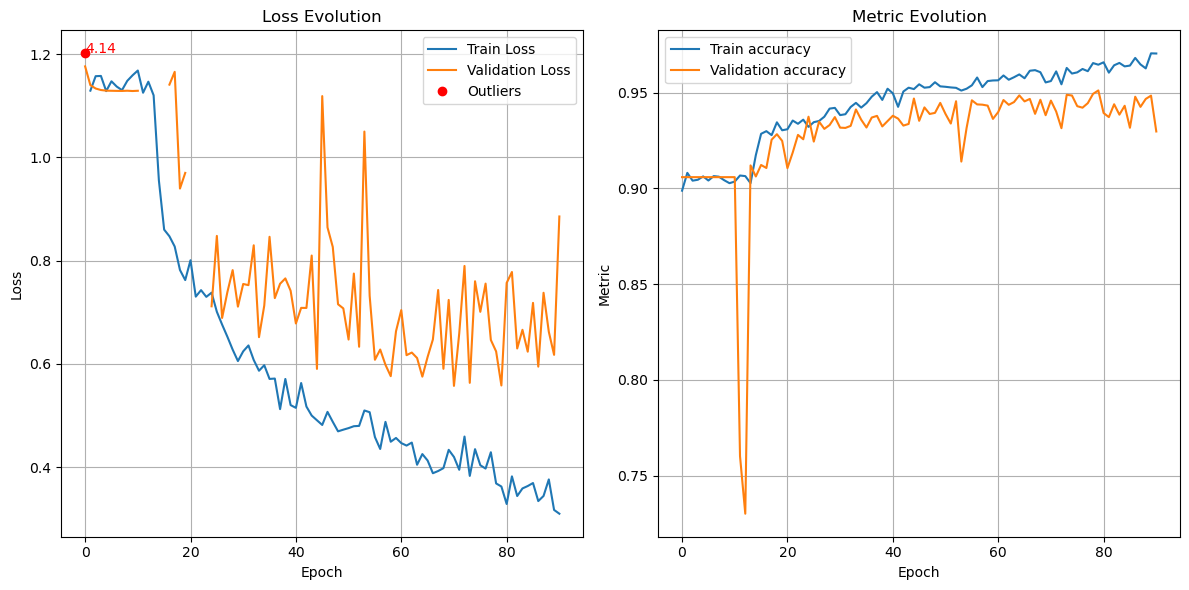

(<keras.engine.functional.Functional at 0x1c4fb14ef40>,
 <keras.callbacks.History at 0x1c4f54551f0>)

In [8]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
    lambda: get_basic_model(
        HEIGHT,
        WIDTH,
        num_classes,
        metrics=METRICS,
        biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)